## RandomForest only use and evaluation


In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import koreanize_matplotlib


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/모델링데이터/df_1_label.csv"
df = pd.read_csv(path)
df.head()

보증금만원  계약분기  건축년도  계약연도  계약개월수   층   전용면적m  계약구분보완(범주)  거래량  갱신요구권사용(2진)  \
0  38000.0     2  2004  2019     24  18  59.700           1   86            0   
1  51500.0     2  2000  2019     24  12  84.710           1  373            0   
2  47000.0     2  2000  2019     24   2  84.870           1  509            0   
3  70000.0     2  2017  2019     24   8  84.614           1  107            0   
4  70000.0     2  2017  2019     24   6  84.836           1  106            0   

   종전계약유무(2진)  구_단지별_이상치만원(2진)  클러스터   지하철_거리(m)  초등학교 거리(미터)    Index  Rate  \
0           0                0    16  386.605843   342.200105  2203.59  1.75   
1           0                0    29  331.830814   451.914304  2203.59  1.75   
2           0                0    18  201.533731   357.832334  2203.59  1.75   
3           0                0     9  566.332822   231.623284  2203.59  1.75   
4           0                0    14  566.332822   231.623284  2203.59  1.75   

     PpRate      보증금면적비  
0  5.285769  636.515913  
1  5.285769  607.956558  
2  5.285769  553.788147  
3  5.285769  827.286265  
4  5.285769  825.121411

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ✅ Feature & Target 설정
X = df.drop(columns=["보증금만원"])  # "보증금만원"이 Target 변수

y = df["보증금만원"]

# ✅ 학습 데이터 & 테스트 데이터 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📌 학습 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

📌 학습 데이터 크기: (718442, 18), 테스트 데이터 크기: (179611, 18)


## 랜덤포레스트 하이퍼 파라미터 설정 모델: `rf_model`
- `n_estimators=300`,  # 트리 개수
- `max_depth=15`,  # 트리 깊이 제한
- `min_samples_split=5`,  # 노드 분할 최소 샘플 개수
- `min_samples_leaf=2`,  # 리프 노드 최소 샘플 개수
- `max_features= 7`,  # 사용할 Feature 개수 통상적으로 회귀 모델에서는 `Feature/3`
-` random_state=42`

In [7]:
# ✅ 랜덤포레스트 모델 생성
rf_model = RandomForestRegressor(
    n_estimators=500,  # 트리 개수
    max_depth=18,  # 트리 깊이 제한
    min_samples_split=10,  # 노드 분할 최소 샘플 개수
    min_samples_leaf=2,  # 리프 노드 최소 샘플 개수
    max_features= 10,  # 사용할 Feature 개수
    random_state=42,
    n_jobs=-1,
)

# ✅ 모델 학습
rf_model.fit(X_train, y_train)


📌 [랜덤포레스트 모델] MAE: 89.98, RMSE: 269.28


In [109]:
# TEST data
y_pred_rf = rf_model.predict(X_test)

# 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


In [110]:
print(f"[랜덤포레스트 모델] \n 트리 개수: 500\n 트리 깊이 제한=18 \n 노드 분할 최소 샘플 개수: 10 \n 리프 노드 최소 샘플 개수: 2 \n 속성 제한: 10 \n random_state: 42 \n \n MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

[랜덤포레스트 모델] 
 트리 개수: 500
 트리 깊이 제한=18 
 노드 분할 최소 샘플 개수: 10 
 리프 노드 최소 샘플 개수: 2 
 속성 제한: 10 
 random_state: 42 
 
 MAE: 89.75, RMSE: 265.92


In [111]:
residuals = y_test - y_pred_rf

## 랜덤포레스트 기본 모델: `rf_model_2`
- n_estimators=100 # 100개의 트리로만 실시

In [11]:
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

rf_model_2.fit(X_train, y_train)

y_pred_rf_2 = rf_model_2.predict(X_test)
mae_rf_2 = mean_absolute_error(y_test, y_pred_rf_2)
rmse_rf_2 = np.sqrt(mean_squared_error(y_test, y_pred_rf_2))

print(f"📌 [랜덤포레스트 모델 tree: 100] MAE: {mae_rf_2:.2f}, RMSE: {rmse_rf_2:.2f}")

SyntaxError: positional argument follows keyword argument (<ipython-input-11-18510f56c271>, line 1)

## 랜덤포레스트 튜닝 2: rf_model_3
- n_estimators = 1000
- max_depth=20,  # 트리 깊이 제한
- min_samples_split=8,  # 노드 분할 최소 샘플 개수
-  min_samples_leaf=5,  # 리프 노드 최소 샘플 개수
- max_features= 7,  # 사용할 Feature 개수
- random_state=42

In [9]:
rf_model_3 = RandomForestRegressor(n_estimators = 1000,
    max_depth=20,  # 트리 깊이 제한
    min_samples_split=8,  # 노드 분할 최소 샘플 개수
    min_samples_leaf=5,  # 리프 노드 최소 샘플 개수
    max_features= 7,  # 사용할 Feature 개수
    n_jobs=-1,
    random_state=42)

rf_model_3.fit(X_train, y_train)

📌 [랜덤포레스트 모델3] MAE: 26.15, RMSE: 137.88


In [10]:
y_pred_rf_3 = rf_model_3.predict(X_test)
mae_rf_3 = mean_absolute_error(y_test, y_pred_rf_3)
rmse_rf_3 = np.sqrt(mean_squared_error(y_test, y_pred_rf_3))

print(f"📌 [랜덤포레스트 모델3] MAE: {mae_rf_3:.2f}, RMSE: {rmse_rf_3:.2f}")

📌 [랜덤포레스트 모델3] MAE: 221.95, RMSE: 596.58


### 모델 주요도 추출

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Feature 중요도 추출
feature_importance_rf = rf_model_2.feature_importances_
feature_names = X.columns

# ✅ Feature Importance 데이터프레임 생성
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# ✅ Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(y=importance_df_rf['Feature'], x=importance_df_rf['Importance'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

# ✅ 상위 10개 Feature 출력
print("📌 랜덤포레스트 상위 10개 중요한 변수:")
print(importance_df_rf.head(10))

NameError: name 'rf_model' is not defined

<ipython-input-8-9d62406ead8d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_df_rf_2['Feature'], x=importance_df_rf_2['Importance'], palette="viridis")


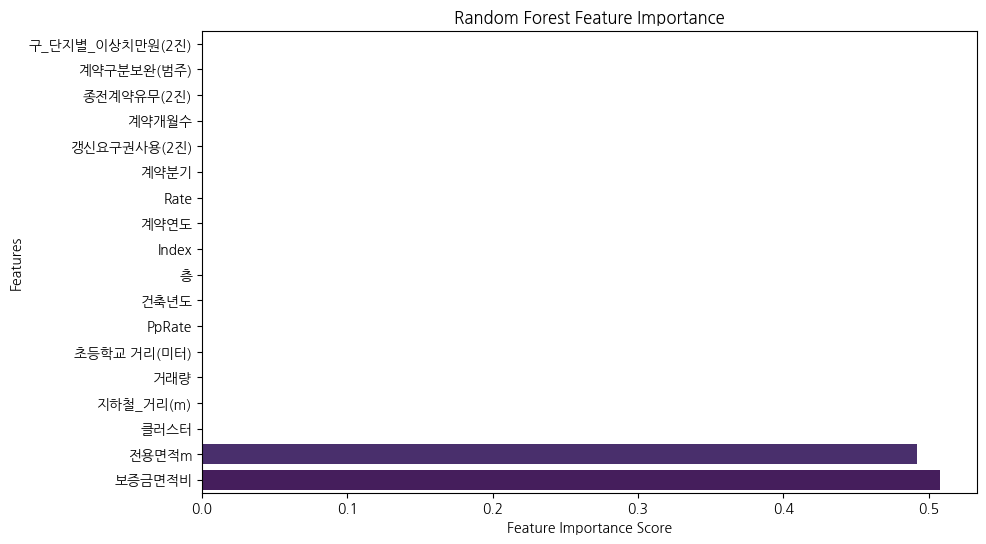

📌 랜덤포레스트 상위 10개 중요한 변수:
        Feature  Importance
17       보증금면적비    0.507704
5         전용면적m    0.492165
11         클러스터    0.000091
12    지하철_거리(m)    0.000005
7           거래량    0.000005
13  초등학교 거리(미터)    0.000004
16       PpRate    0.000004
1          건축년도    0.000004
4             층    0.000004
14        Index    0.000004


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Feature 중요도 추출
feature_importance_rf_2 = rf_model_2.feature_importances_
feature_names = X.columns

# ✅ Feature Importance 데이터프레임 생성
importance_df_rf_2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf_2})
importance_df_rf_2 = importance_df_rf_2.sort_values(by='Importance', ascending=False)

# ✅ Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(y=importance_df_rf_2['Feature'], x=importance_df_rf_2['Importance'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
plt.show()

# ✅ 상위 10개 Feature 출력
print("📌 랜덤포레스트 상위 10개 중요한 변수:")
print(importance_df_rf_2.head(10))

# 결과 탐색

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def analyze_residual_distribution(model_name, y_test, y_pred, dpi=500):
    """
    모델의 잔차/실제값 비율을 분석하여 KDE 그래프 & QQ-Plot을 고화질(DPI 설정)로 생성하는 함수.

    Parameters:
    - model_name: 모델 이름 (str) (예: "RandomForest_1", "XGBoost_2")
    - y_test: 실제값 (numpy array 또는 pandas Series)
    - y_pred: 예측값 (numpy array 또는 pandas Series)
    - dpi: 그래프 해상도 설정 (기본값: 500)

    Returns:
    - relative_residual: 잔차/실제값 비율 (numpy array)
    """
    # ✅ 잔차 및 상대 오차 계산
    residuals = y_test - y_pred
    relative_residual = (residuals / (y_test + 1e+02)) * 100  # 퍼센트 변환 (실제값 기준)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=dpi)  # ✅ 고화질 설정

    # ✅ KDE(커널 밀도) 그래프
    sns.kdeplot(relative_residual, fill=True, color="purple", alpha=0.6, ax=axes[0])
    axes[0].axvline(0, color="black", linestyle="--")  # 0 기준선 추가
    axes[0].set_xlabel("Relative Residual [(Residuals / Observed Values) × 100]", fontsize=14)
    axes[0].set_ylabel("Density", fontsize=14)
    axes[0].set_title(f"KDE Plot of Relative Residual (%) ({model_name})", fontsize=16, fontweight='bold')
    axes[0].grid(axis='x', linestyle="--", alpha=0.7)

    # ✅ QQ-Plot (표준화된 잔차 사용)
    standardized_residuals = (residuals - np.mean(residuals)) / (np.std(residuals) + 1e-10)  # 표준화된 잔차
    stats.probplot(standardized_residuals, dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ Plot of Standardized Residuals ({model_name})", fontsize=16, fontweight='bold')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    return relative_residual

# ✅ 사용 예제 (모델별 실행)
# relative_residual_rf = analyze_residual_distribution("RandomForest", y_test, y_pred_rf)
# relative_residual_xgb = analyze_residual_distribution("XGBoost", y_test, y_pred_xgb)

## 잔차비를 퍼센트로 전환

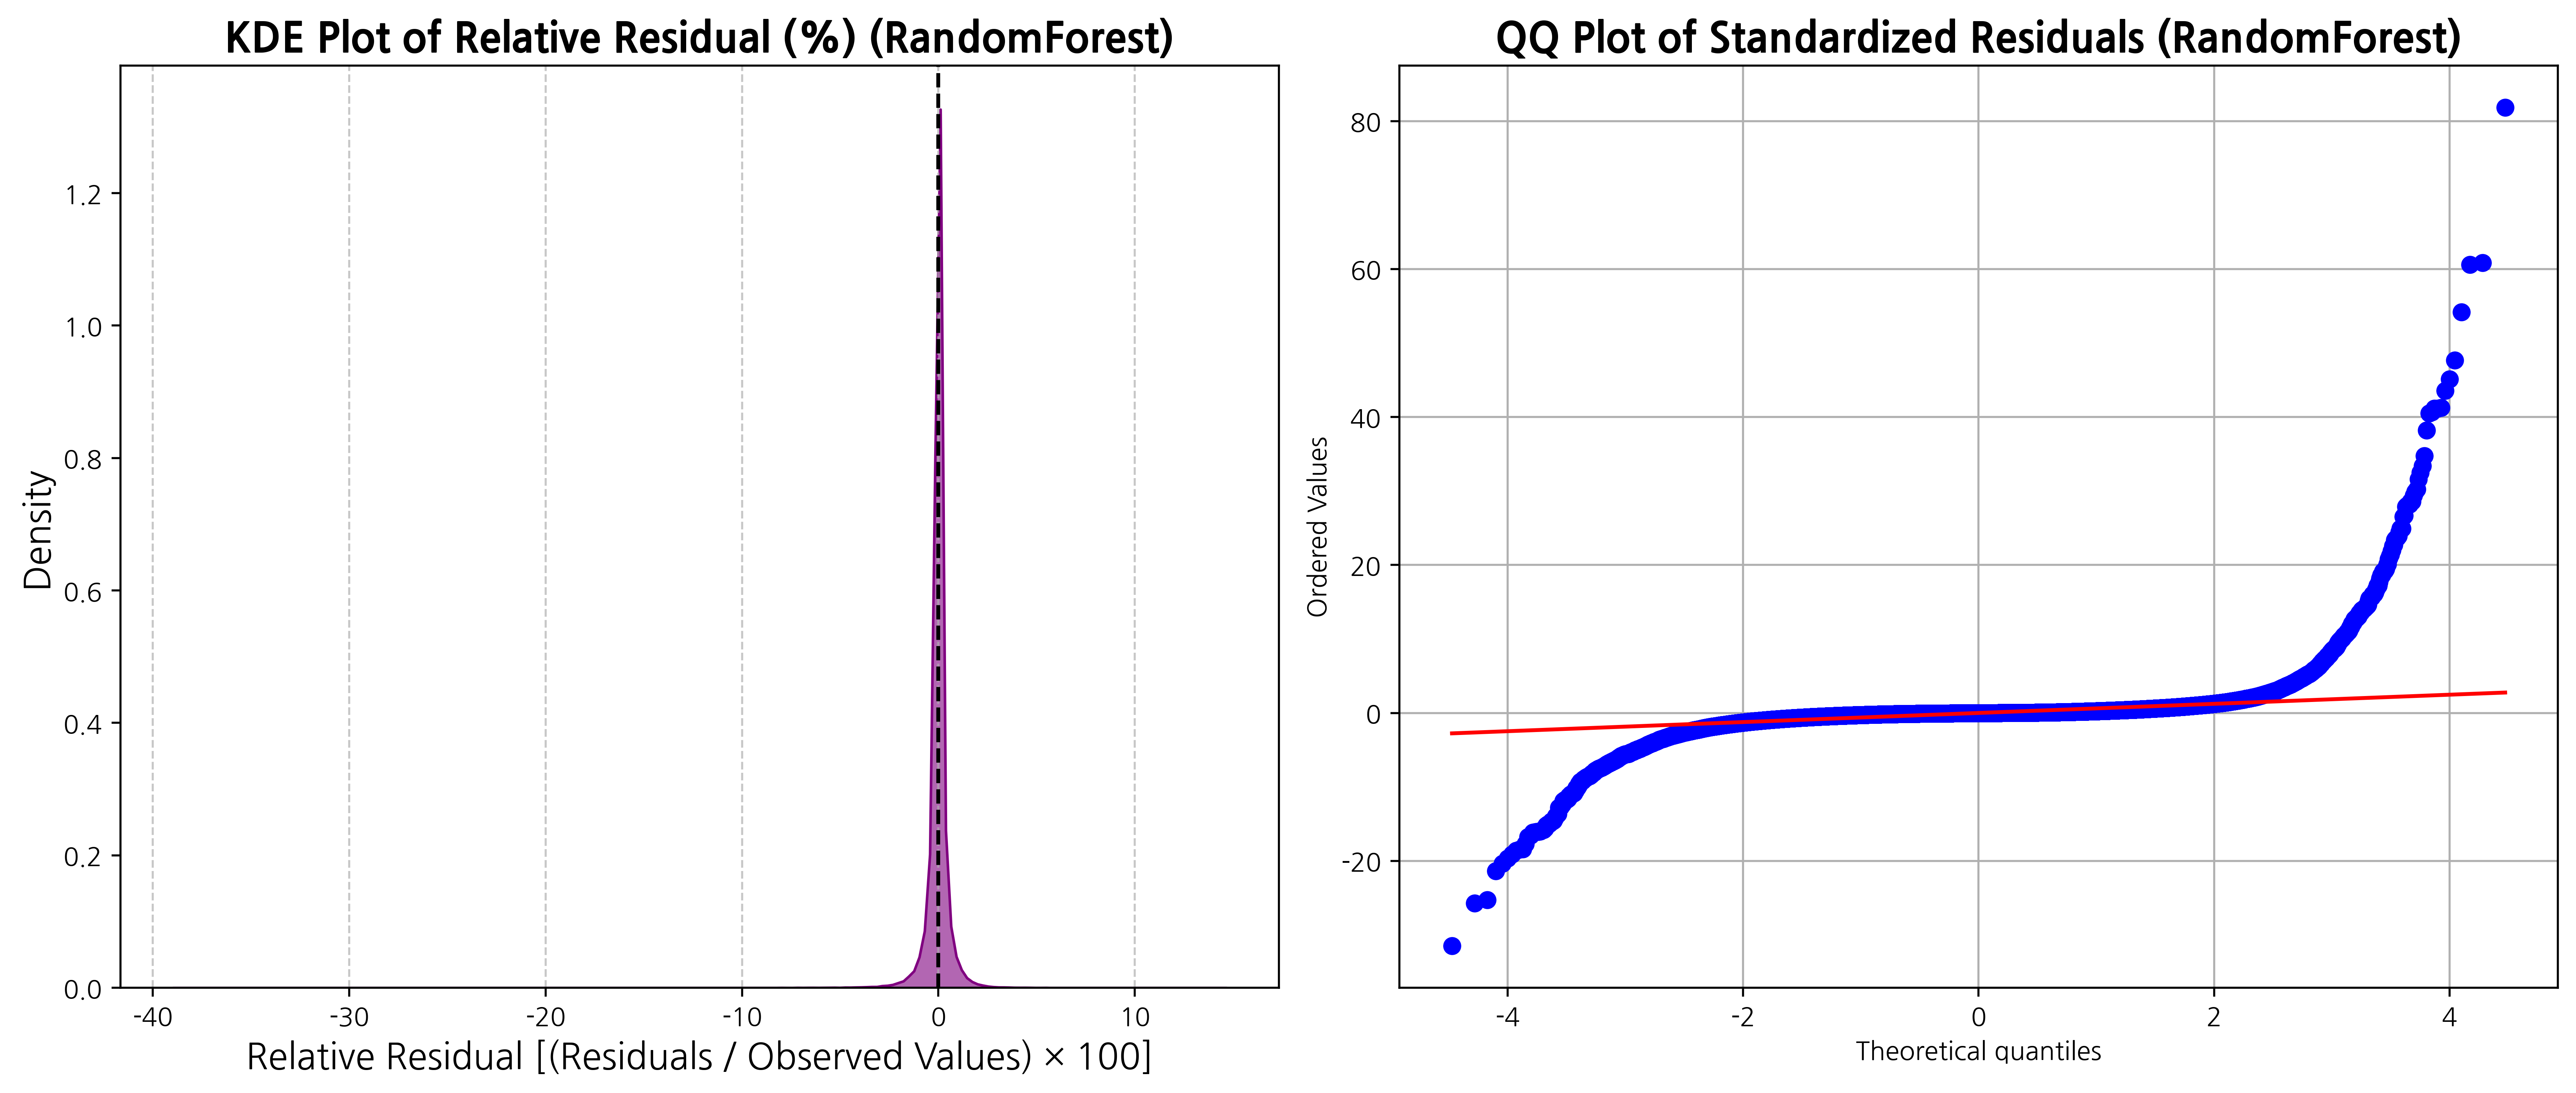

In [154]:
# ✅ 랜덤포레스트 1번째 모델 결과 분석 (고화질)
residual_ratio_rf_1 = analyze_residual_distribution("RandomForest", y_test, y_pred_rf, dpi=500)

# residual_ratio_rf_2 = analyze_residual_distribution("RandomForest2", y_test, y_pred_rf_2, dpi=500)

# residual_ratio_rf_3 = analyze_residual_distribution("RandomForest3", y_test, y_pred_rf_3, dpi=500)

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals_scatter(residuals, feature_values, feature_name, model_name):
    """
    특정 Feature에 따른 잔차의 산점도(Scatter Plot)를 시각화하는 함수.

    Parameters:
    - residuals: 모델의 잔차 값 (y_test - y_pred)
    - feature_values: 특정 Feature의 값 (예: 단지 클러스터, 면적 등)
    - feature_name: Feature 이름 (문자열, 그래프 제목용)
    - model_name: 모델 이름 (문자열, 그래프 제목용)

    Returns:
    - 시각화된 산점도 그래프
    """
    plt.figure(figsize=(12, 6), dpi=300)

    # ✅ 산점도 플롯
    sns.scatterplot(x=feature_values, y=residuals, color="red", alpha=0.6, edgecolor="black")
    plt.axhline(0, color="black", linestyle="--")  # 기준선 추가
    plt.xlabel(feature_name, fontsize=12)
    plt.ylabel("Absolute Residuals", fontsize=12)
    plt.title(f"Absolute residuals (%) Scatter Plot by {feature_name} ({model_name})", fontsize=14, fontweight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.show()

# ✅ 사용 예제
# plot_residuals_scatter(residuals, X_test["단지클러스터"], "단지 클러스터", "RandomForest")
# plot_residuals_scatter(residuals, X_test["전용면적m"], "전용면적 (㎡)", "RandomForest")

In [138]:
residuals = abs(y_test - y_pred_rf)
residual_ratio = (residuals / (y_test+ 100)) * 100  # 퍼센트 변환


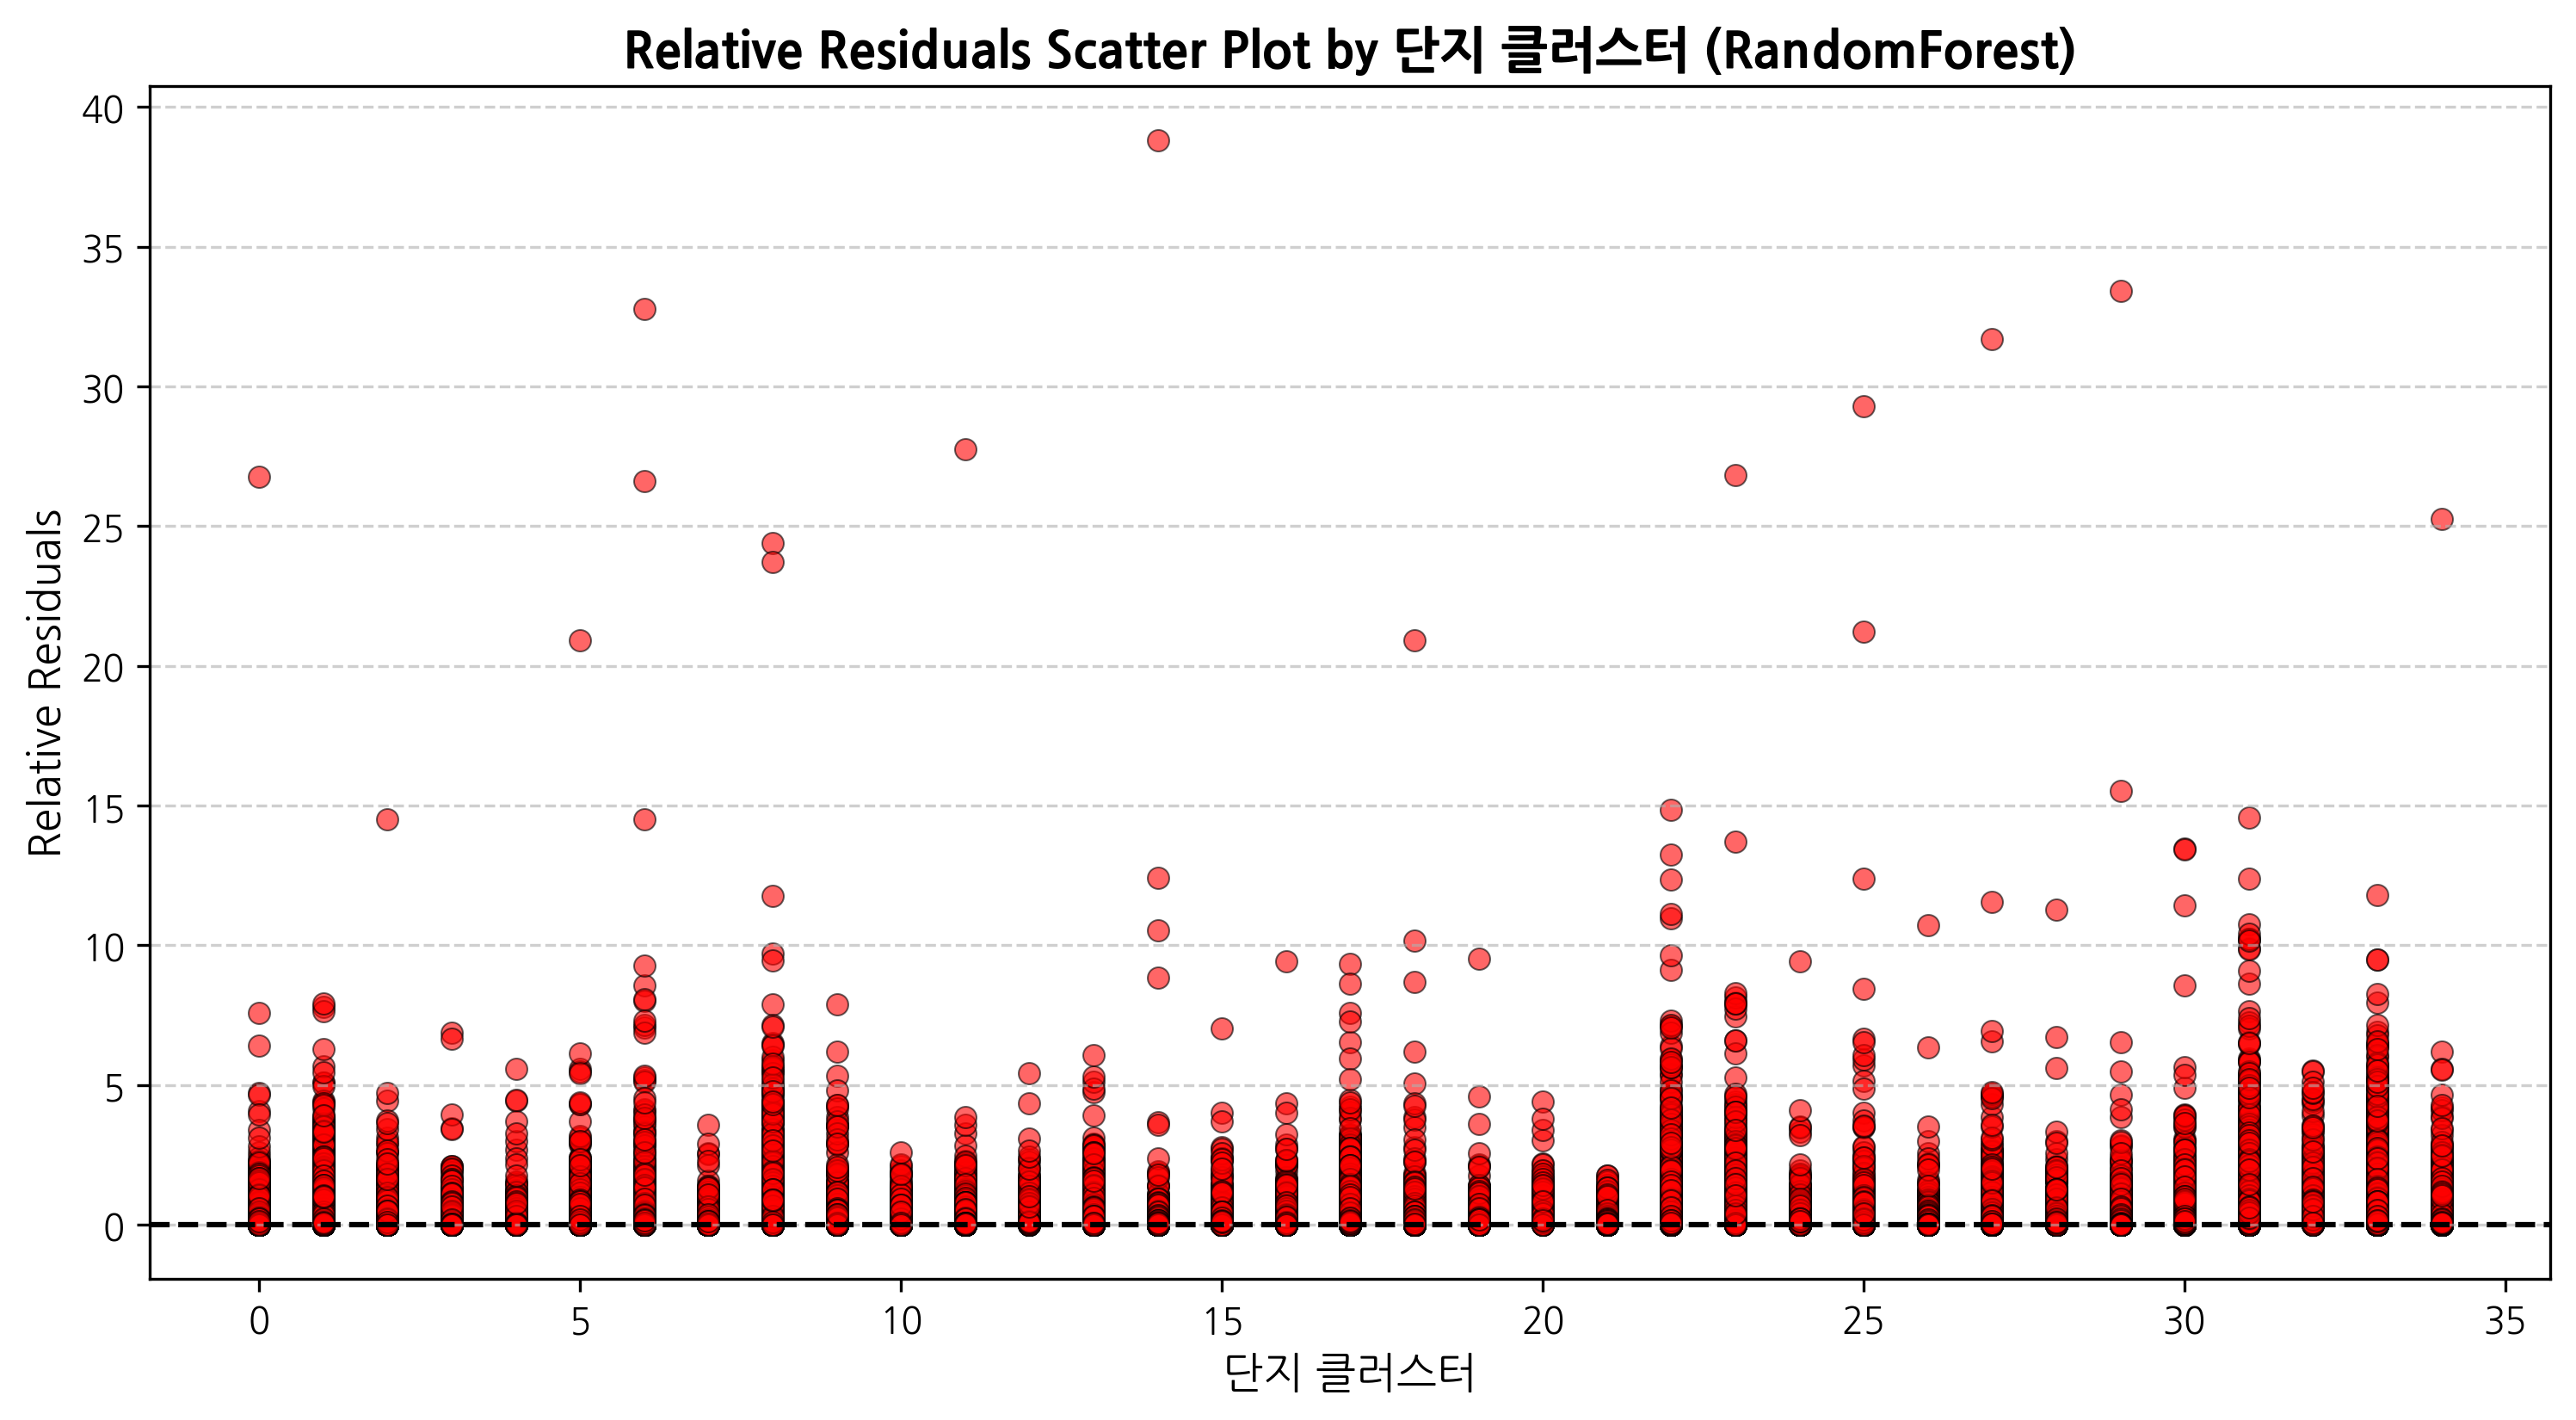

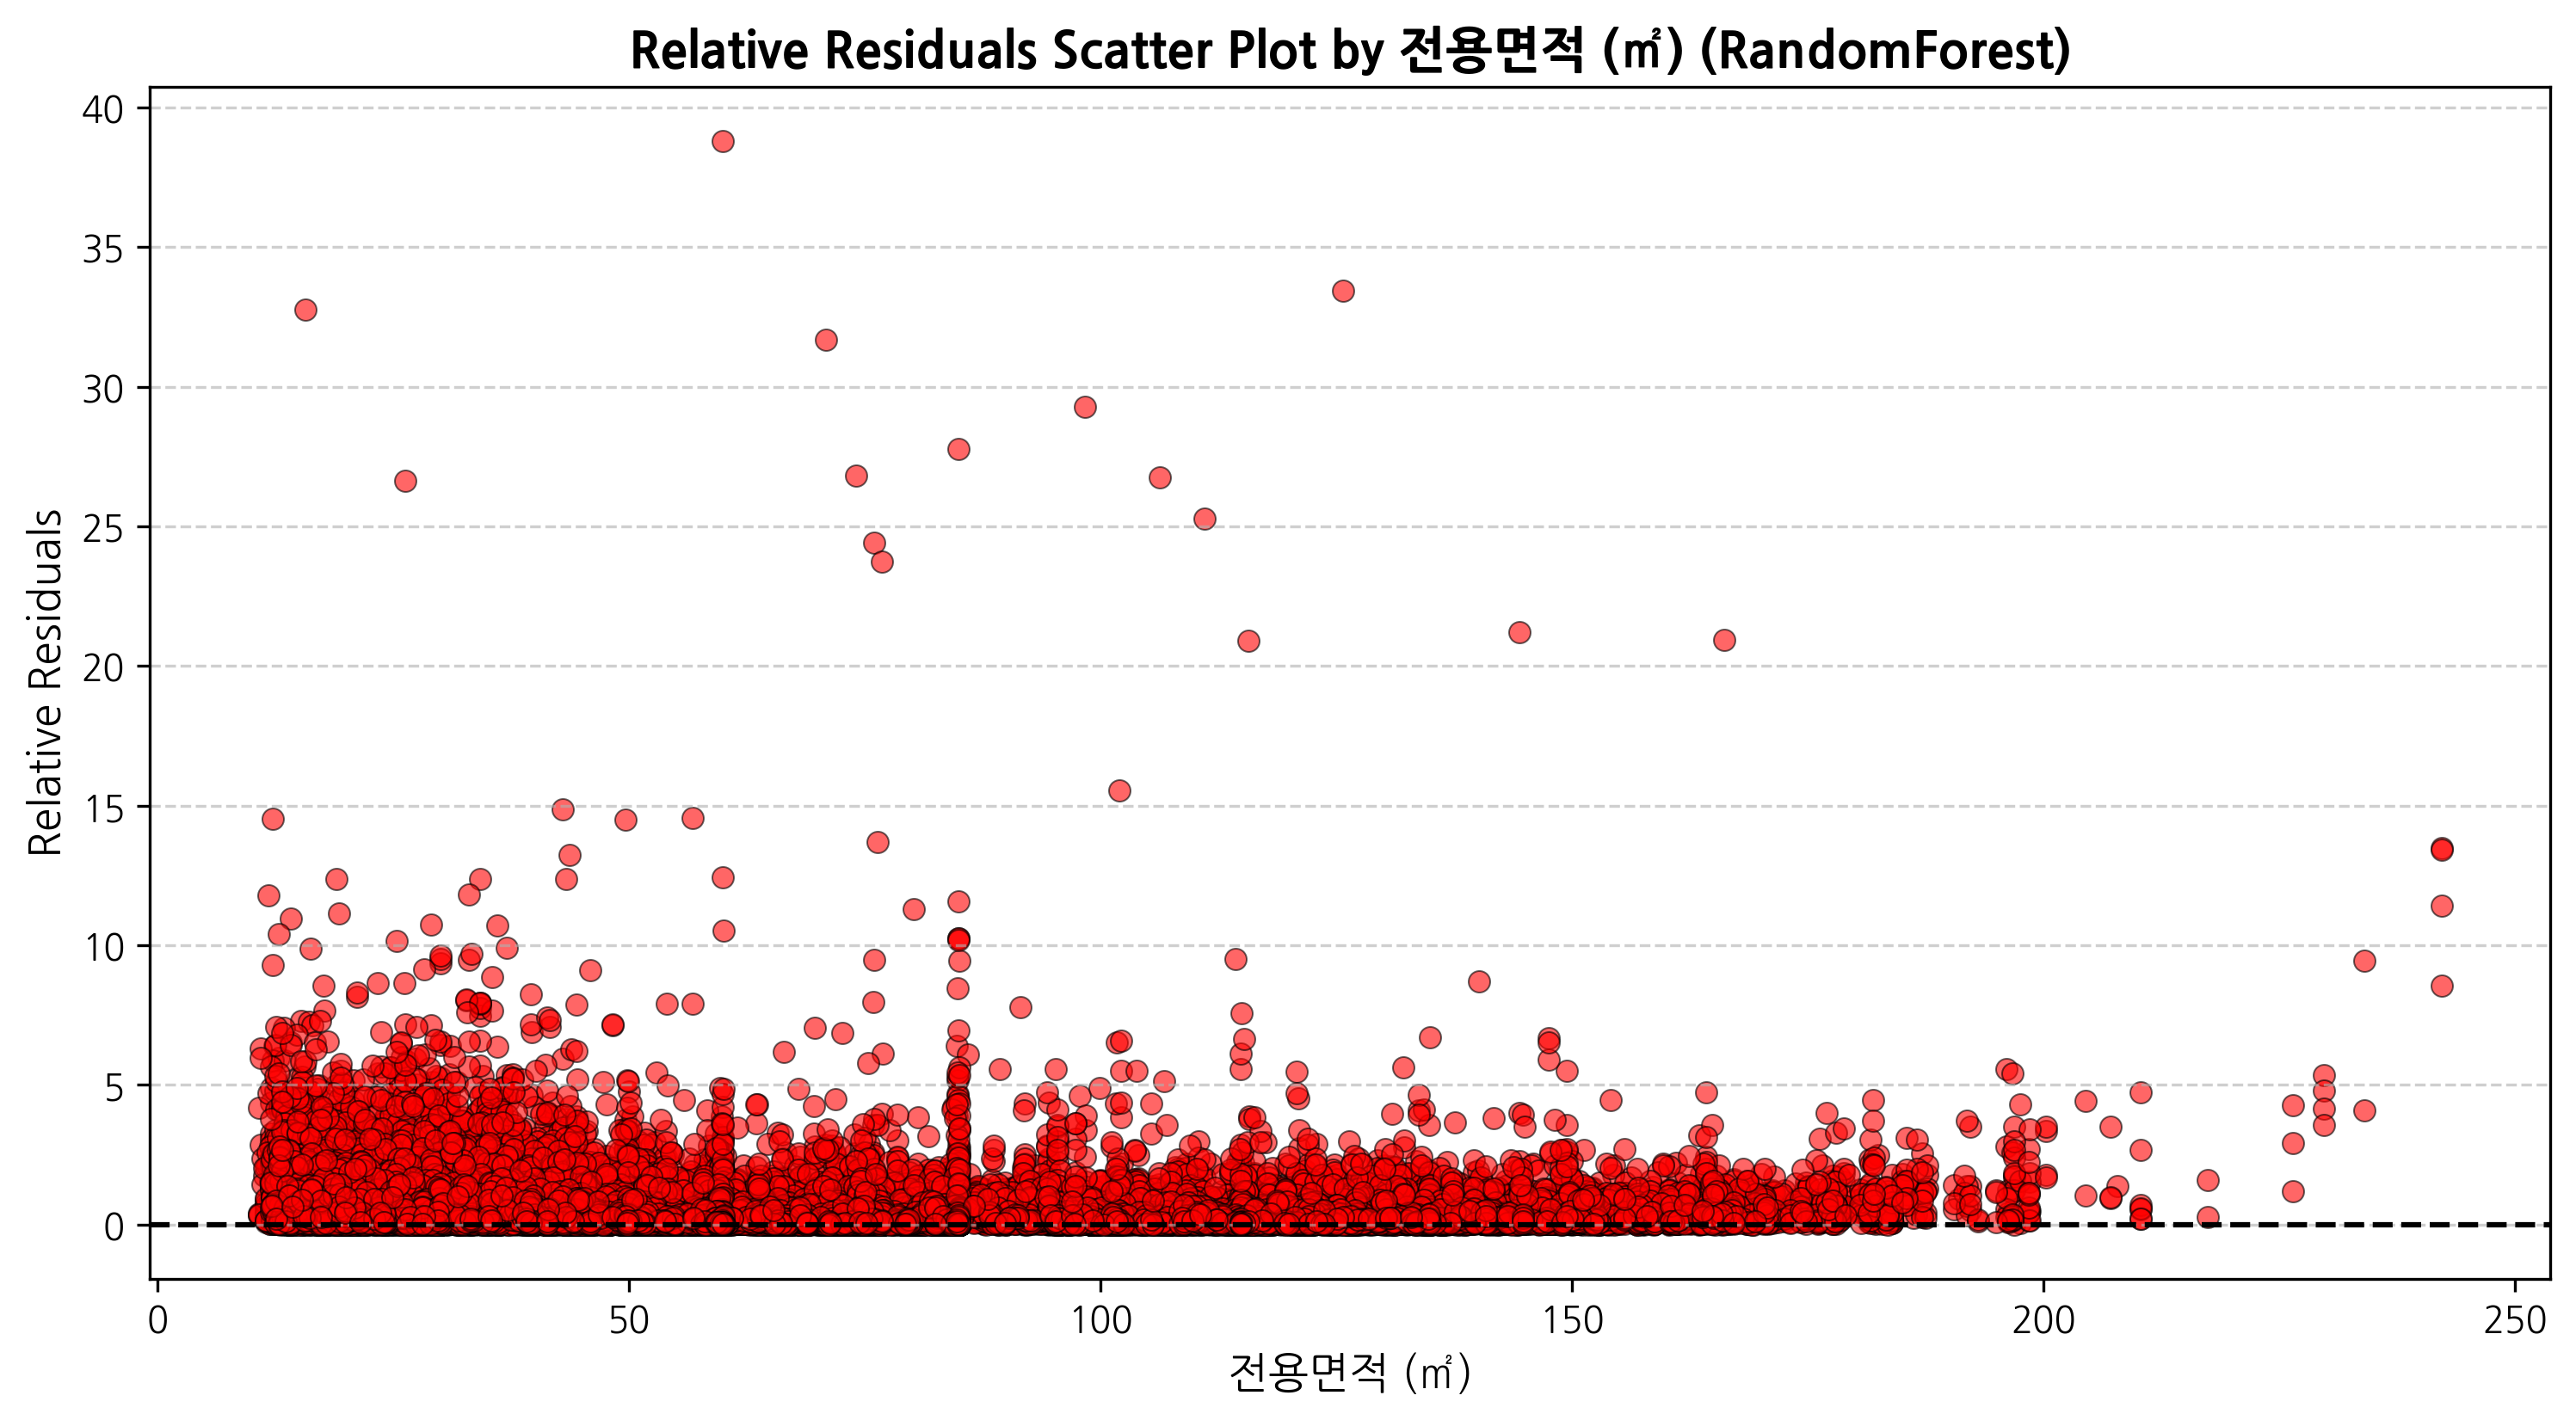

In [139]:
# ✅ 사용 예제
plot_residuals_scatter(residual_ratio, X_test["클러스터"], "단지 클러스터", "RandomForest")
plot_residuals_scatter(residual_ratio, X_test["전용면적m"], "전용면적 (㎡)", "RandomForest")

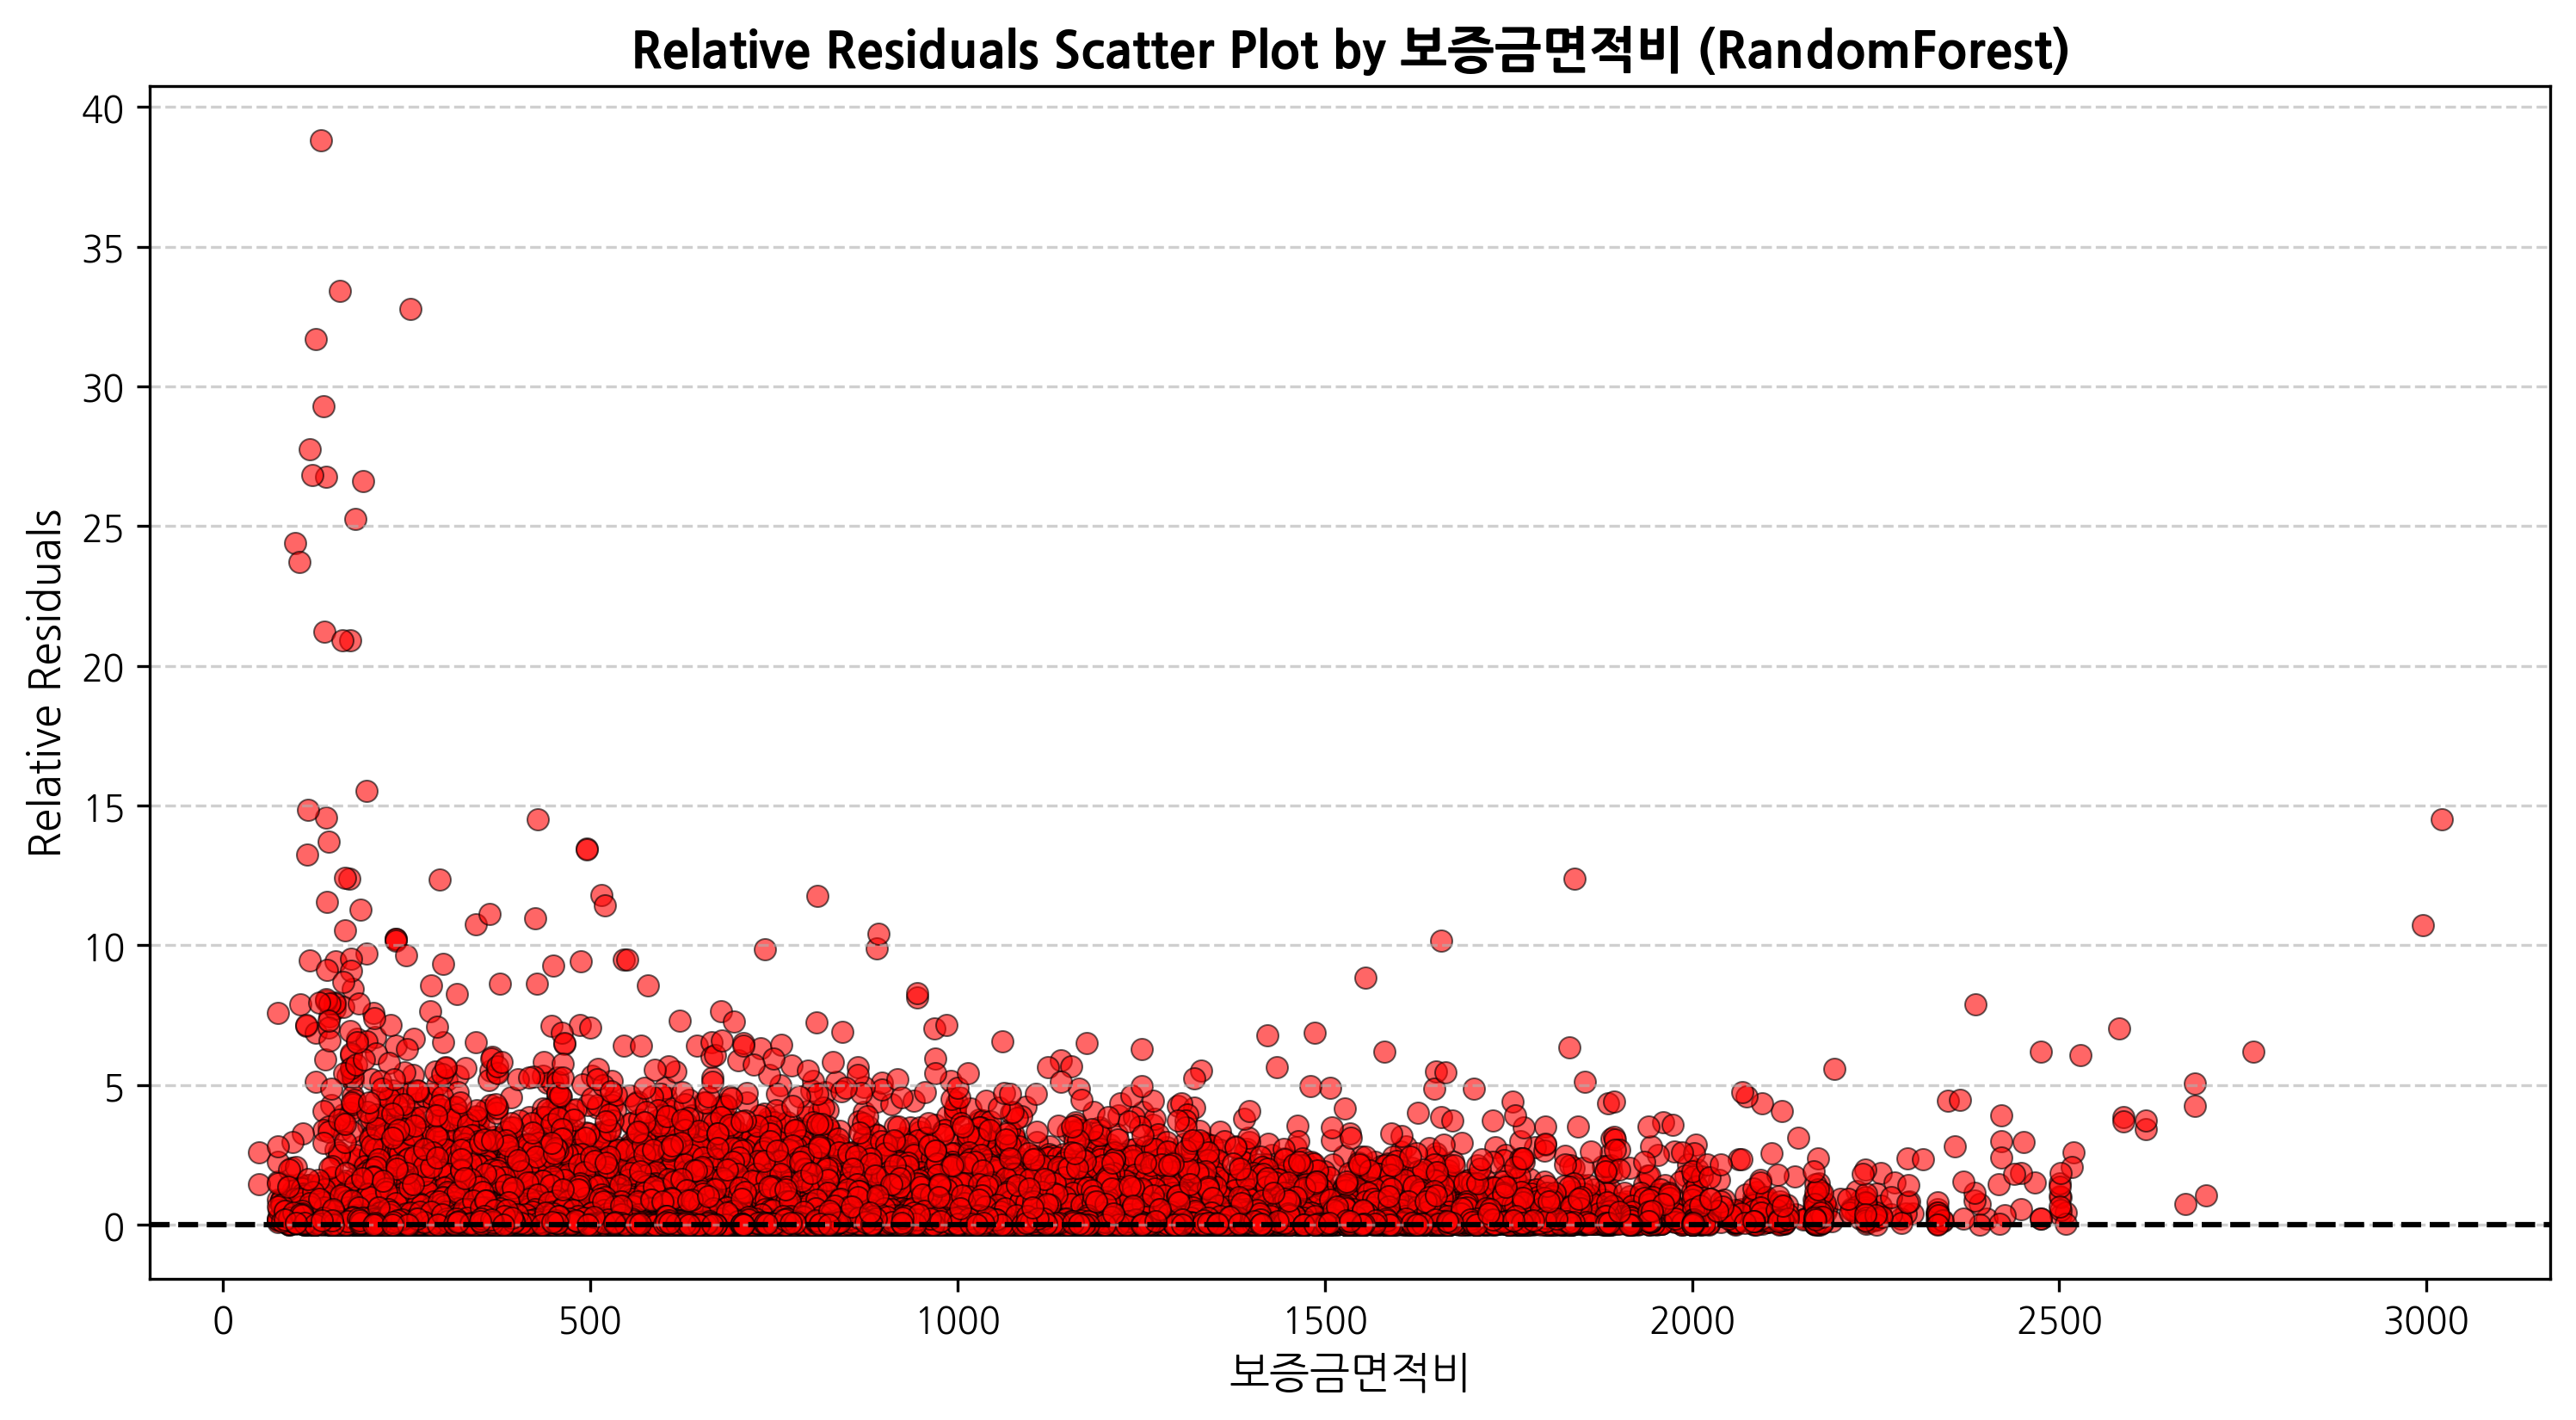

In [140]:
plot_residuals_scatter(residual_ratio, X_test["보증금면적비"], "보증금면적비", "RandomForest")

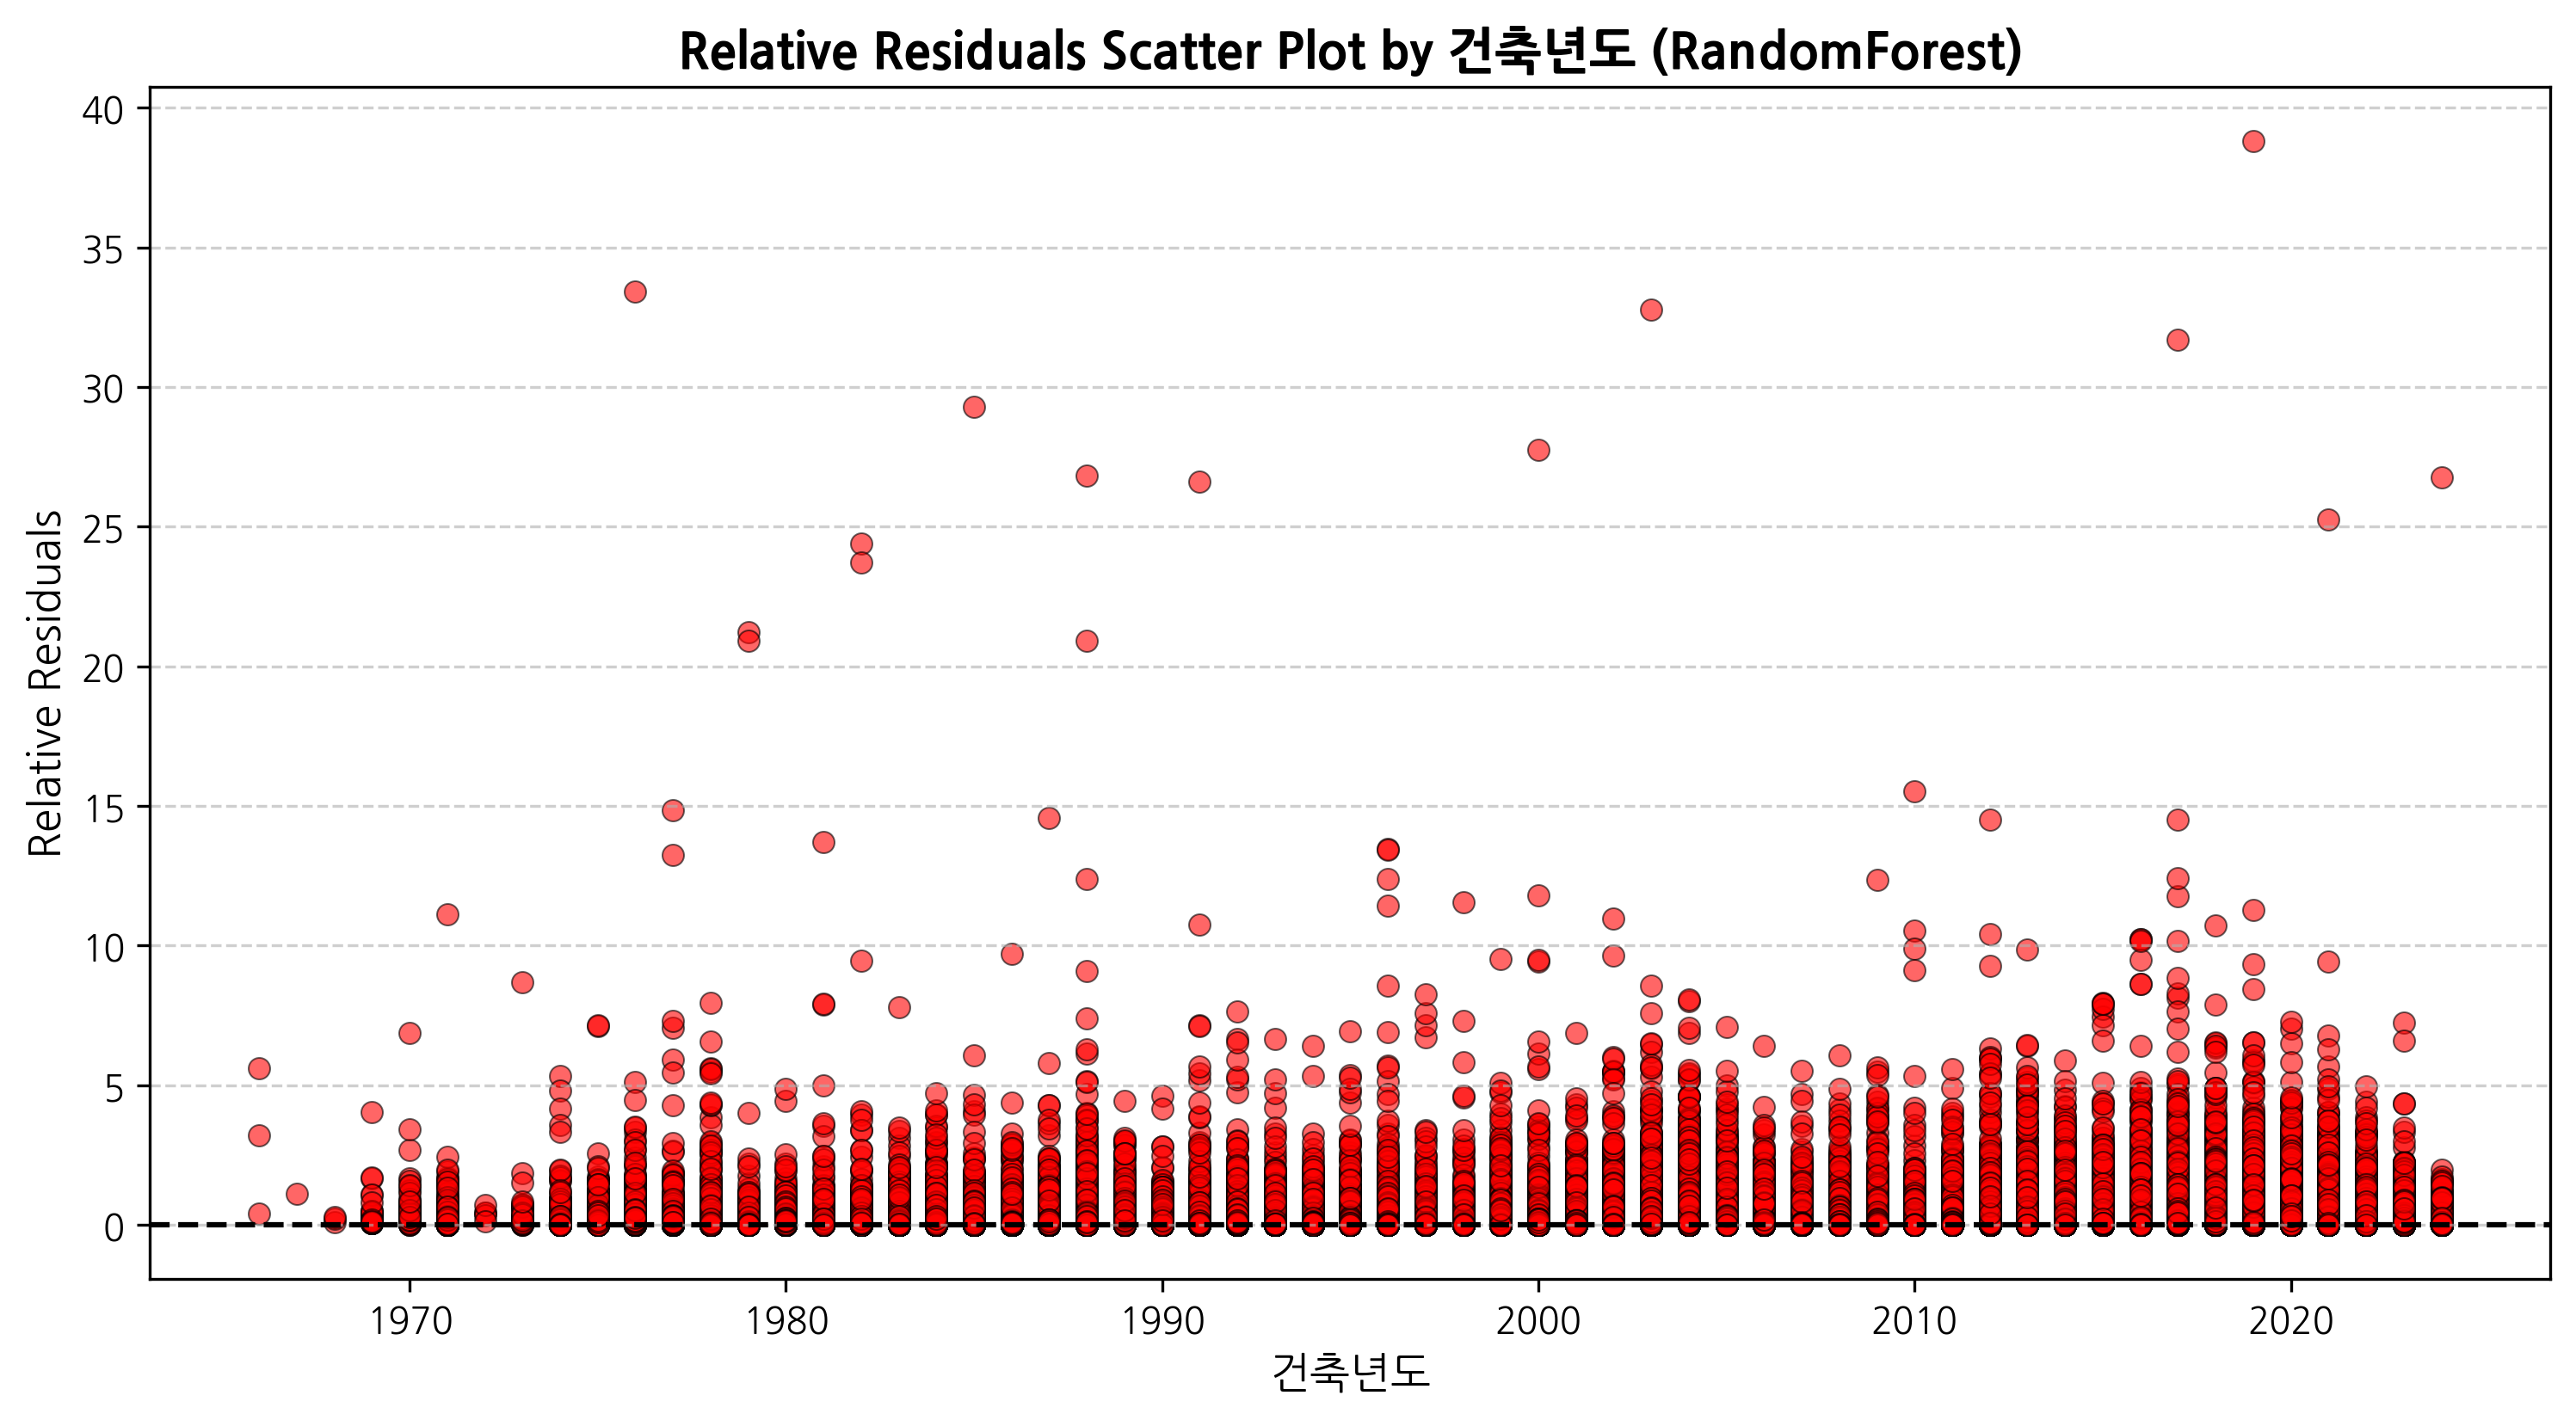

In [141]:

plot_residuals_scatter(residual_ratio, X_test["건축년도"], "건축년도", "RandomForest")

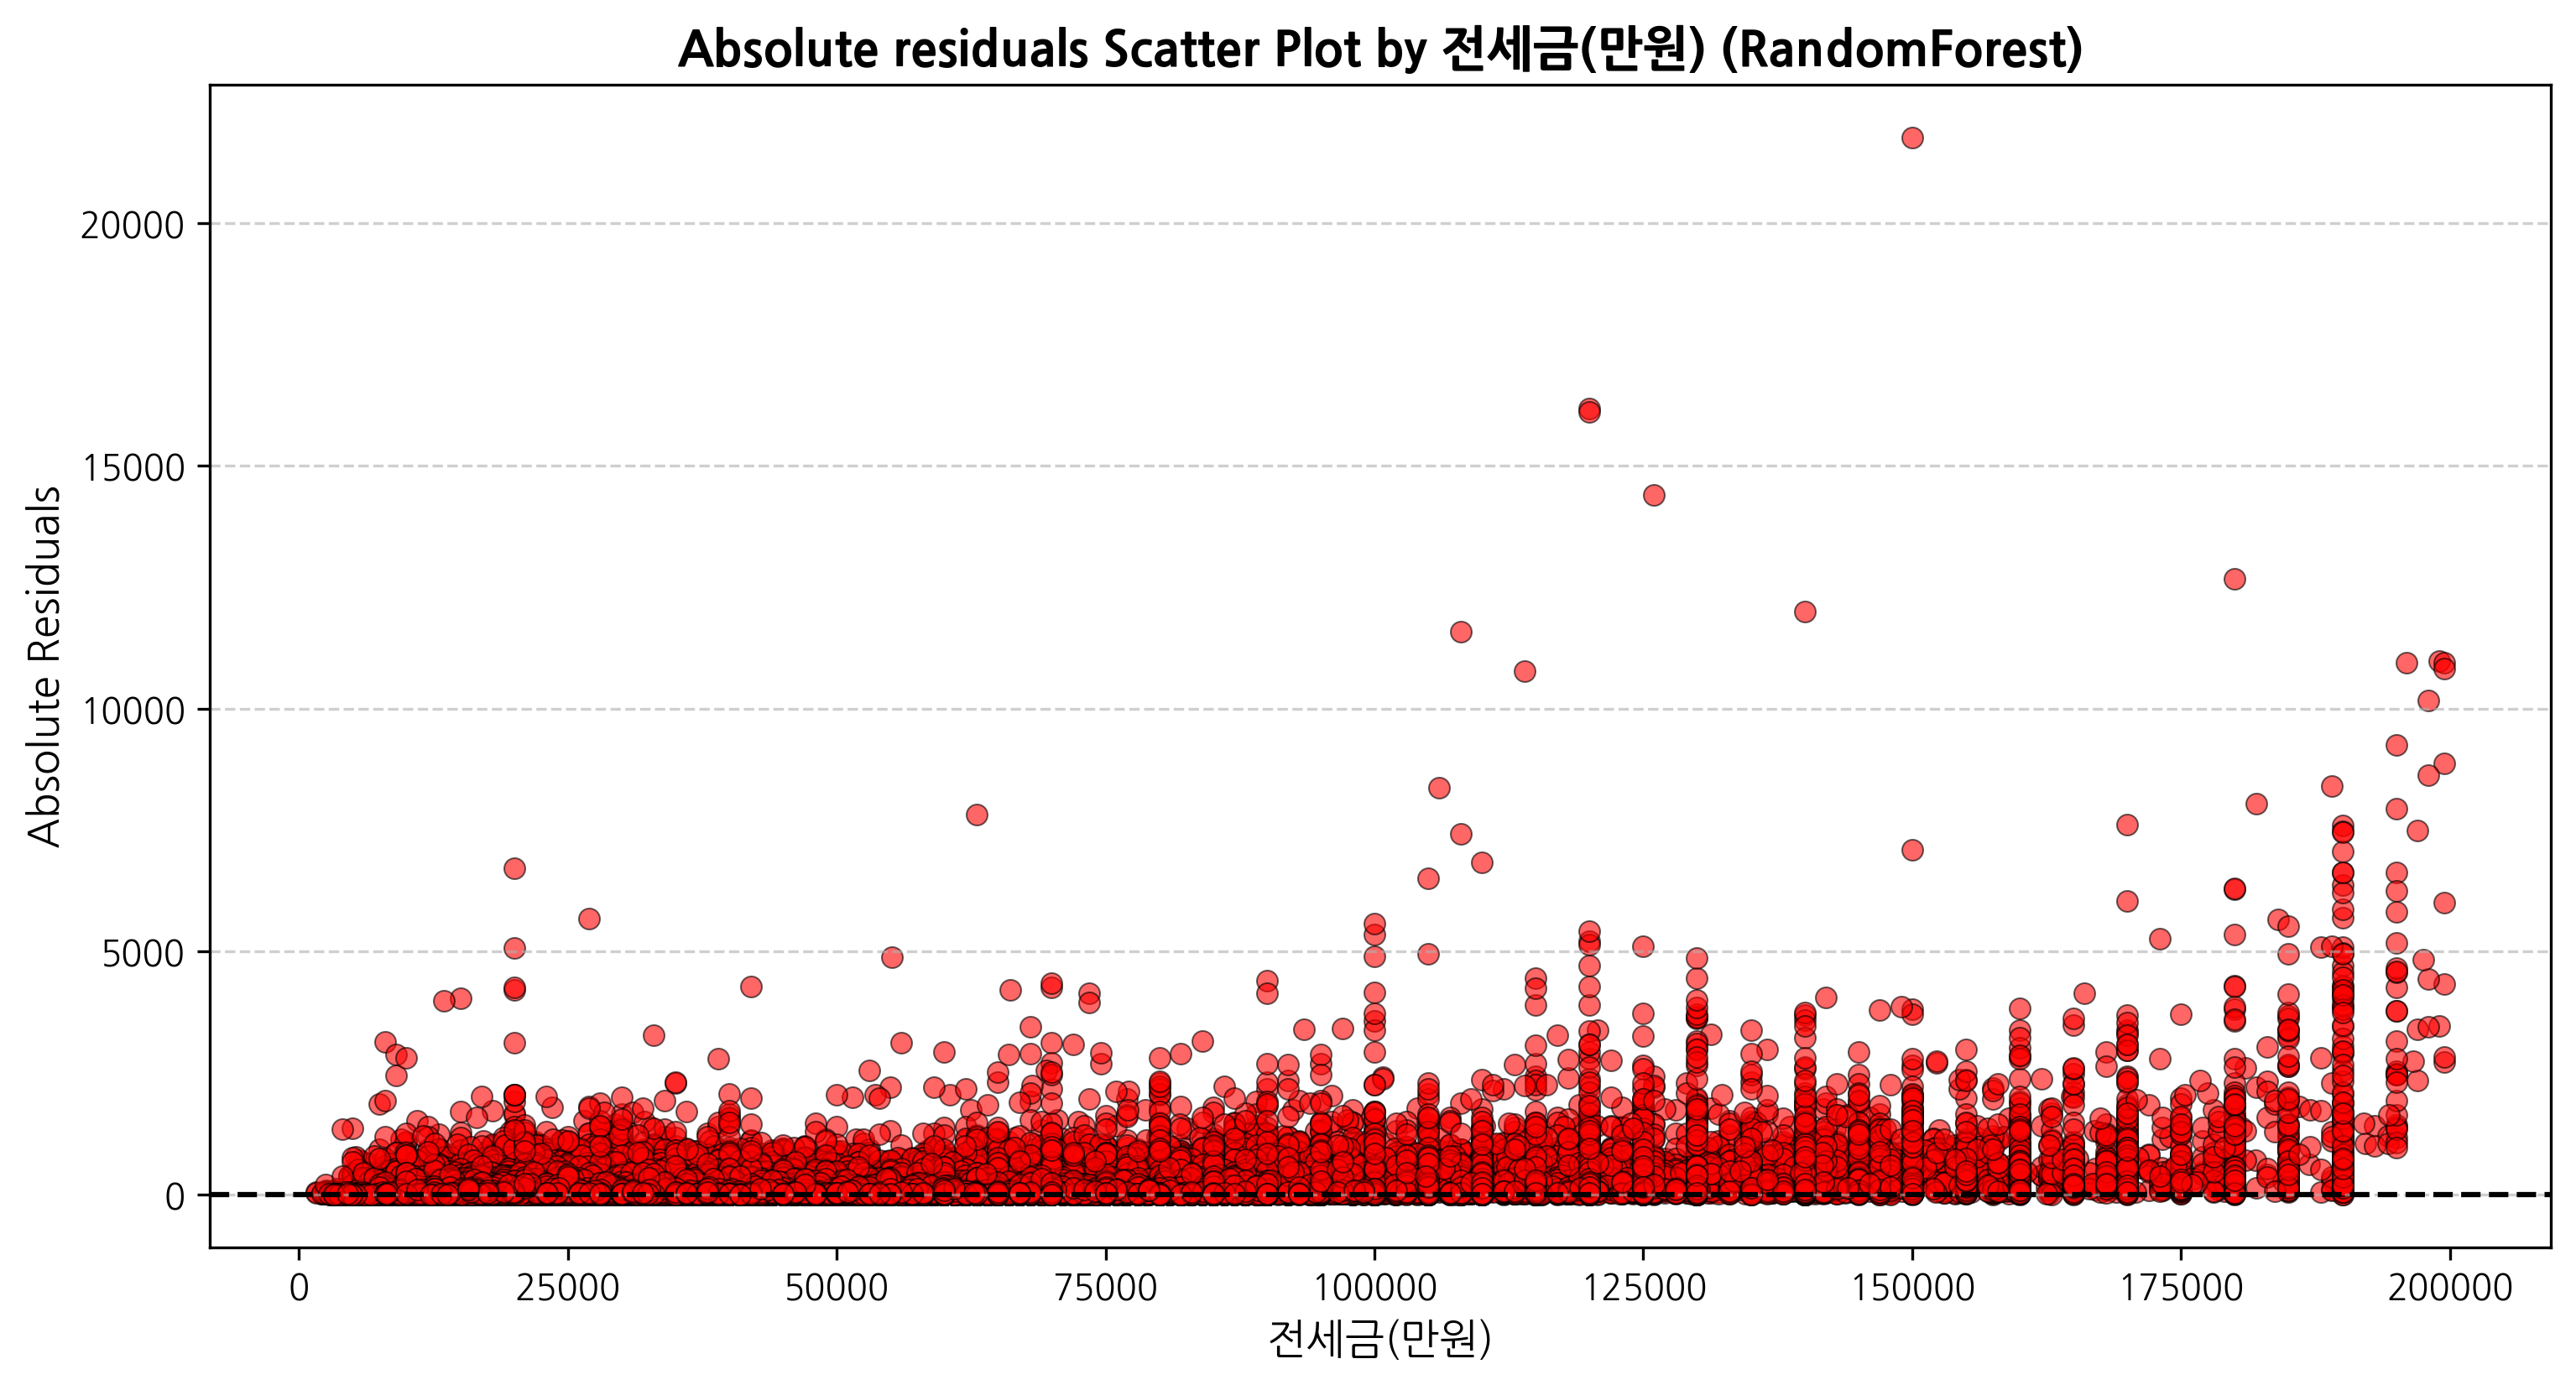

In [147]:
plot_residuals_scatter(residuals, y_test, "전세금(만원)", "RandomForest")

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898053 entries, 0 to 898052
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   보증금만원            898053 non-null  float64
 1   계약분기             898053 non-null  int64  
 2   건축년도             898053 non-null  int64  
 3   계약연도             898053 non-null  int64  
 4   계약개월수            898053 non-null  int64  
 5   층                898053 non-null  int64  
 6   전용면적m            898053 non-null  float64
 7   계약구분보완(범주)       898053 non-null  int64  
 8   거래량              898053 non-null  int64  
 9   갱신요구권사용(2진)      898053 non-null  int64  
 10  종전계약유무(2진)       898053 non-null  int64  
 11  구_단지별_이상치만원(2진)  898053 non-null  int64  
 12  클러스터             898053 non-null  int64  
 13  지하철_거리(m)        892579 non-null  float64
 14  초등학교 거리(미터)      892579 non-null  float64
 15  Index            898053 non-null  float64
 16  Rate             898053 non-null  floa

In [103]:
ind = residual_ratio < 45

In [104]:
ind

798160    True
895473    True
199835    True
883998    True
25506     True
          ... 
540842    True
845007    True
255725    True
456830    True
686630    True
Name: 보증금만원, Length: 179611, dtype: bool

In [105]:
ind

798160    True
895473    True
199835    True
883998    True
25506     True
          ... 
540842    True
845007    True
255725    True
456830    True
686630    True
Name: 보증금만원, Length: 179611, dtype: bool

In [106]:
y_test = y_test[ind]

In [107]:
X_test = X_test[ind]

In [108]:
y_test

798160    11000.0
895473    21820.0
199835    80000.0
883998    30320.0
25506     39000.0
           ...   
540842    45000.0
845007    15750.0
255725    15750.0
456830    36000.0
686630    13819.0
Name: 보증금만원, Length: 179604, dtype: float64

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, feature_names, model_name):
    """
    랜덤포레스트 모델의 Feature Importance를 시각화하는 함수.

    Parameters:
    - model: 학습된 RandomForestRegressor 모델
    - feature_names: Feature 이름 리스트 (X_train.columns)
    - model_name: 모델 이름 (문자열, 그래프 제목용)

    Returns:
    - Feature Importance DataFrame 및 시각화 그래프 출력
    """
    # ✅ Feature 중요도 추출
    feature_importances = model.feature_importances_

    # ✅ DataFrame 생성
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # ✅ 시각화
    plt.figure(figsize=(12, 6), dpi=300)
    sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'], palette="viridis")
    plt.xlabel("Feature Importance Score", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.title(f"Feature Importance ({model_name})", fontsize=14, fontweight="bold")
    plt.gca().invert_yaxis()  # 중요도가 높은 순서로 정렬
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    plt.show()

    return importance_df

# ✅ 사용 예제
# importance_df_rf = plot_feature_importance(rf_model, X_train.columns, "RandomForest")
# print(importance_df_rf.head(10))  # 상위 10개 Feature 출력

<ipython-input-118-e0a2c9833236>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'], palette="viridis")


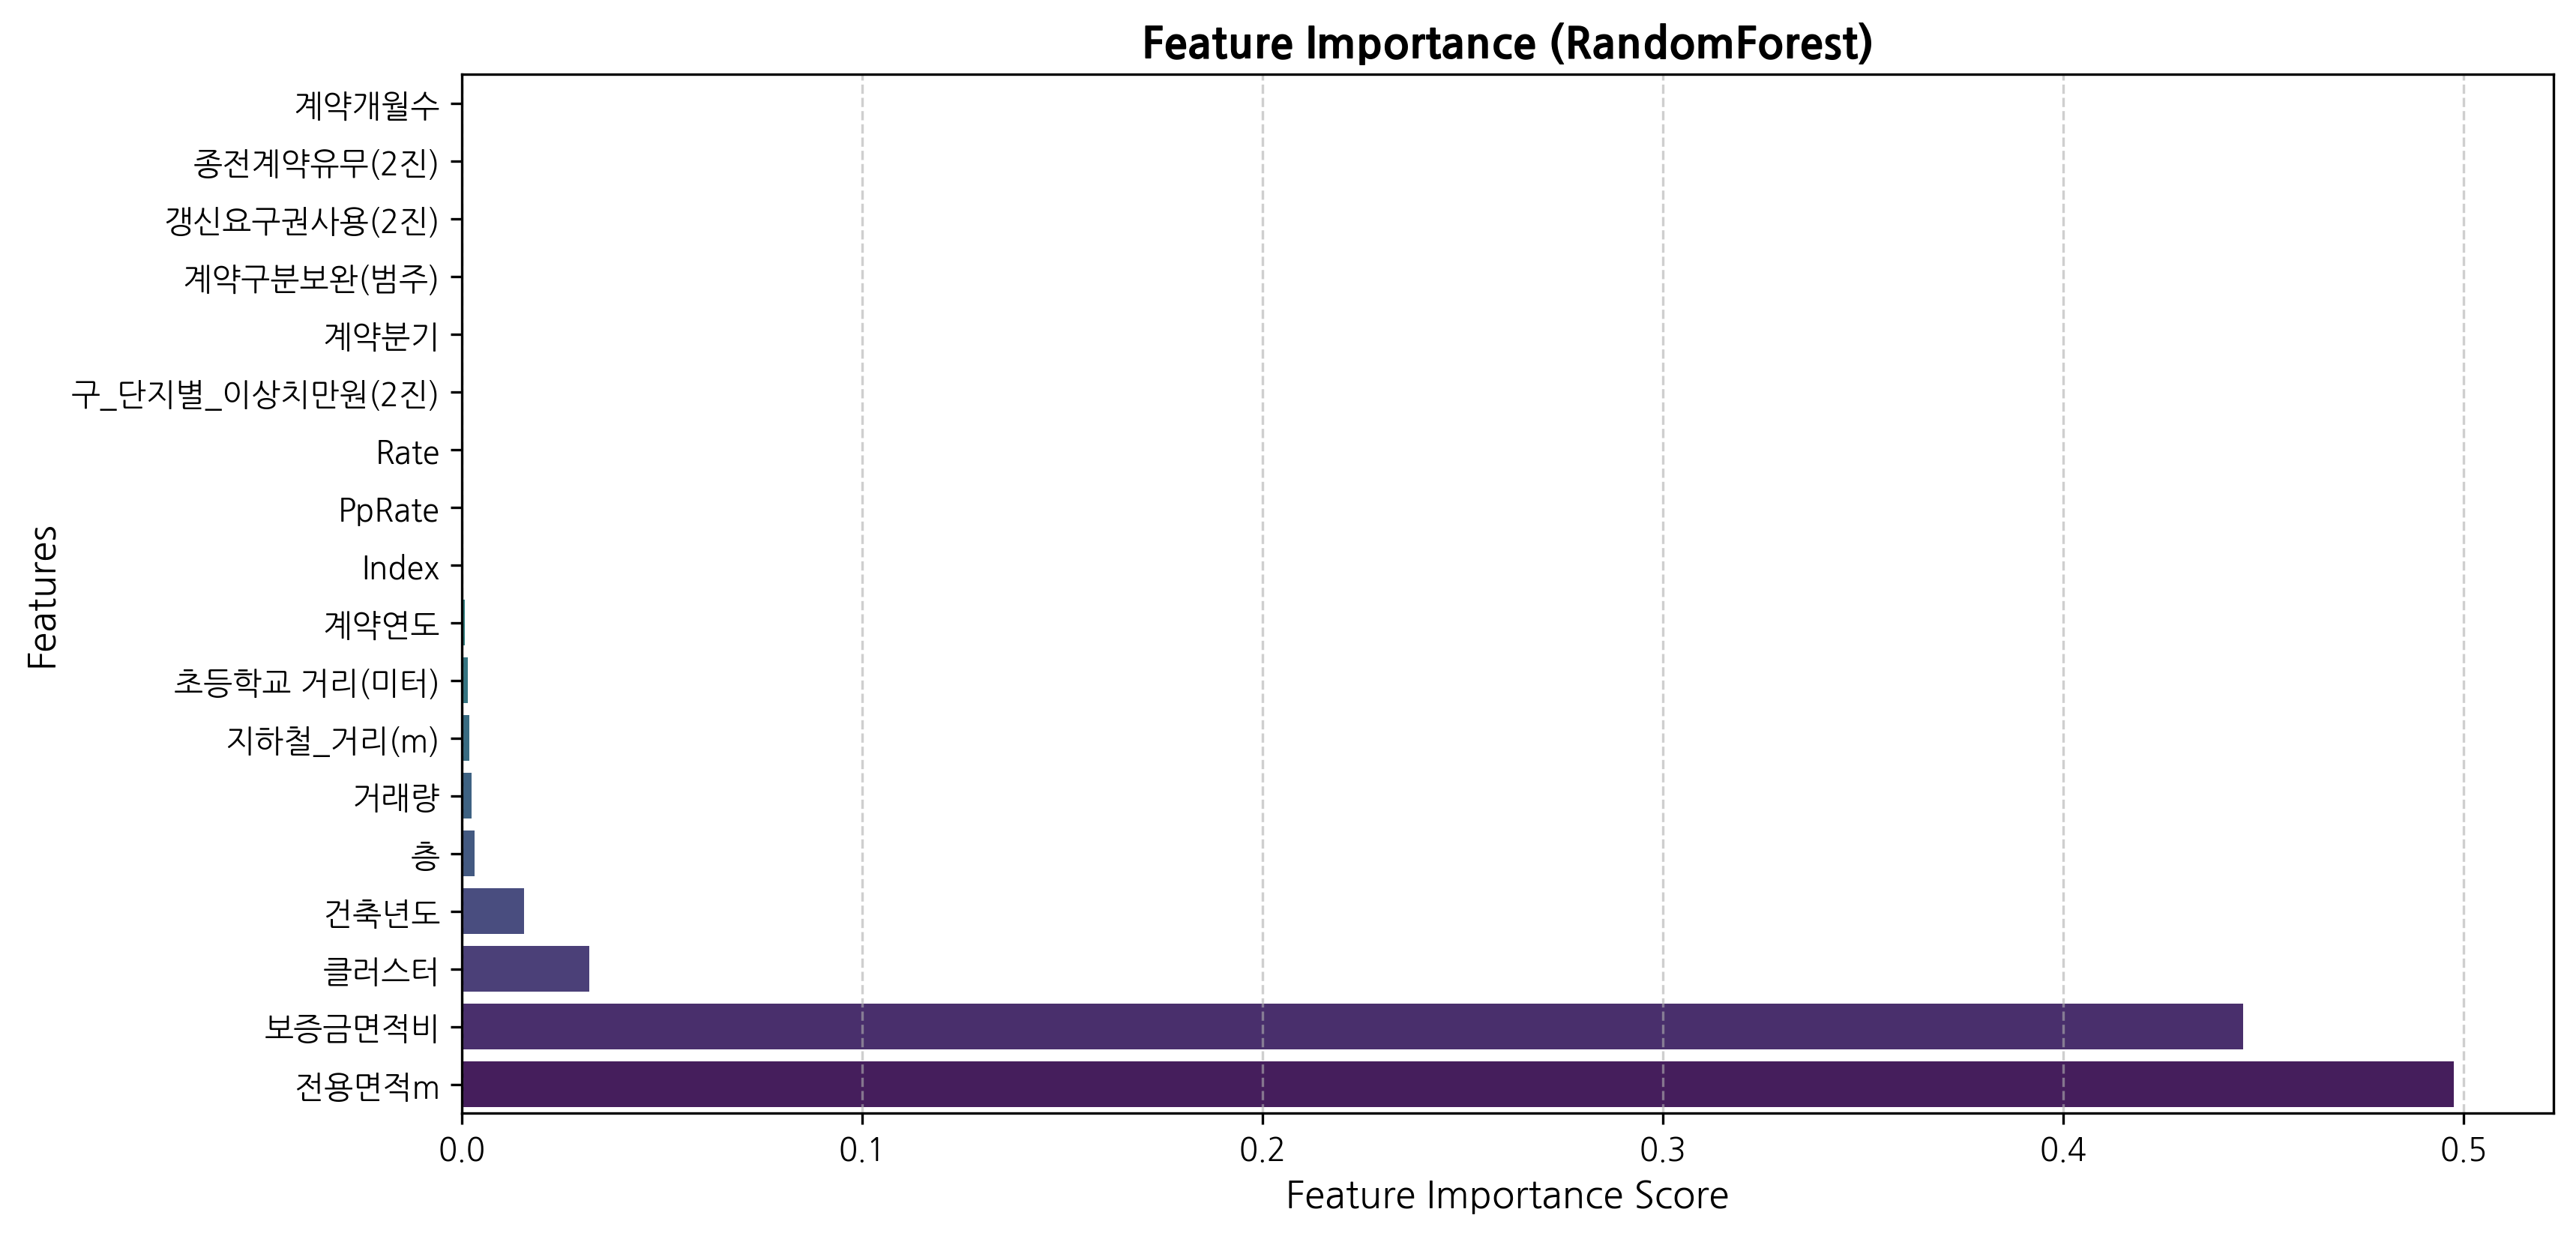

        Feature  Importance
5         전용면적m    0.497563
17       보증금면적비    0.444881
11         클러스터    0.031719
1          건축년도    0.015537
4             층    0.003113
7           거래량    0.002401
12    지하철_거리(m)    0.001881
13  초등학교 거리(미터)    0.001535
2          계약연도    0.000802
14        Index    0.000251


In [119]:
# ✅ 랜덤포레스트 Feature 중요도 분석
importance_df_rf = plot_feature_importance(rf_model, X_train.columns, "RandomForest")

# ✅ 상위 10개 Feature 출력
print(importance_df_rf.head(10))

In [123]:
print("5%를 초과한 예측 오차 갯수: 222","\n5%를 초과한 예측 오차의 비율:", round(222/len(y_test),5) )

5%를 초과한 예측 오차 갯수: 222 
5%를 초과한 예측 오차의 비율: 0.00124
